# Introduction to Structural Mechanics ME-104
__Studio 05) Equilibrium for Structures in 3D, Trusses__

Instructors: [Pedro Reis](mailto:Pedro.Reis@epfl.ch), [Till Junge](mailto:till.junge@epfl.ch)

## Learning goals:
- Solve systems of equations for multi-body structures

## Jupyter Problem 5.1

Determine the force acting on the $ABC$ bar at the support in $A$ of the space frame shown below (Both symbolically and numerically).

<div>

</div>

Numerical application: $l=1$ m, $F=1$ kN.

### Answers
$A=\sqrt{\frac{325}{18}}F=4.25 \text{ kN}$

$\boldsymbol{A} = \left[\begin{matrix}- \frac{2 F}{3}\\- \frac{F}{2}\\\frac{25 F}{6}\end{matrix}\right] = \left[\begin{array}{c}- 666.7 \mathrm{N}\\- 500.0 \mathrm{N}\\4167.0 \mathrm{N}\end{array}\right]$

### Solution 5.1

In [1]:
import sympy as sy
sy.init_printing()

In [2]:
# parameters of the problem 
l, F = sy.symbols('l F', positive=True)

In [3]:
# geometry
r_E = sy.Matrix([3*l, 0, 0])
r_D = sy.Matrix([0, 4*l, 0])
r_B = sy.Matrix([0, 0, 3*l])
r_C = sy.Matrix([0, 0, 4*l])
r_A = sy.Matrix([0, 0, 0])
r_F1 = sy.Matrix([0, 0, 6*l])
r_F2 = (r_D + r_C)/2
display(r_F2)

In [4]:
# forces
F1 = sy.Matrix([0, -F, 0])
F2 = sy.Matrix([-4*F, 0, 0])

In [5]:
# unknowns
B, E = sy.symbols("B, E", real=True)
A = sy.symbols("A_x:z", real=True)
C = sy.symbols("C_x:z", real=True)
D = sy.symbols("D_x:z", real=True)

F_E = E * sy.Matrix([-sy.cos(sy.pi/4), 0, sy.sin(sy.pi/4)])
F_B = B * sy.Matrix([-sy.cos(sy.pi/4), 0, sy.sin(sy.pi/4)])
F_A = sy.Matrix(A)
F_C = sy.Matrix(C)
F_D = sy.Matrix(D)
Zero = sy.Matrix([0,0,0])

display(F_D)

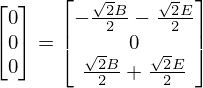

In [6]:
# equilibrium of bar EB
# Note that this is a two-force member -> only one equation necessary, but sympy calculates for us
EB_equilibrium = sy.Eq(Zero, F_E + F_B)
display(EB_equilibrium)

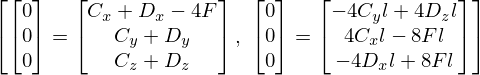

In [7]:
# equilibrium of beam CD
# Note that all forces are concurrent in line CD, and that the forces orly live in the plane CD-x
CD_equilibrium = [sy.Eq(Zero, F_D + F_C + F2), sy.Eq(Zero, r_C.cross(F_C) + r_F2.cross(F2) + r_D.cross(F_D))]
display(CD_equilibrium)

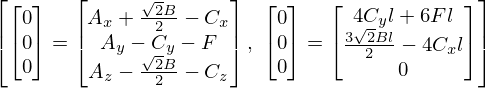

In [8]:
# equilibrium of beam AC
# Note that all the reaction forces here take the opposite sign compared to when they were computed on the bar EB and beam CD

AC_equilibrium = [sy.Eq(Zero, F_A - F_B - F_C + F1), sy.Eq(Zero, r_A.cross(F_A) + r_B.cross(-F_B) + r_C.cross(-F_C) + r_F1.cross(F1))]
display(AC_equilibrium)

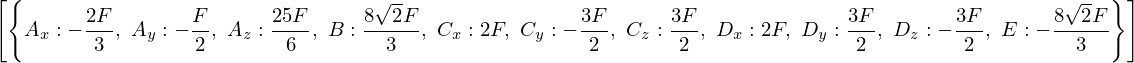

In [9]:
# solve it for the reactions in A
#full system = 
equilibrium = [EB_equilibrium] + CD_equilibrium + AC_equilibrium # I made a list out of the single EB equation to add it to the other lists of equations
display(equilibrium)
unknowns = tuple((*A, B, *C, *D, E))
solutions = sy.solve(equilibrium, unknowns, dict=True)
display(solutions)

We have found a single solution, as expected. Now, we can compute the reaction force acting in point $A$

Force in A


Magnitude of force in A


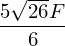

In [10]:
solution = solutions[0]
newton, metre = sy.symbols(r"\mathrm{N} \mathrm{m}", positive=True)
numeric_values = {
    l: 1. * metre,
    F: 1e3 * newton
}
print("Force in A")
display(sy.Eq(F_A, F_A.subs(solution)))
display(sy.Eq(F_A, F_A.subs(solution).subs(numeric_values)))
print("Magnitude of force in A")
display(F_A.subs(solution).norm())
display(F_A.subs(solution).subs(numeric_values).norm())

In [11]:
# for answers in question
print(sy.latex(F_A.subs(solution)))
print(sy.latex(sy.N(F_A.subs(solution).subs(numeric_values), n=4), mat_str="array"))

\left[\begin{matrix}- \frac{2 F}{3}\\- \frac{F}{2}\\\frac{25 F}{6}\end{matrix}\right]
\left[\begin{array}{c}- 666.7 \mathrm{N}\\- 500.0 \mathrm{N}\\4167.0 \mathrm{N}\end{array}\right]


## Jupyter Problem 5.2,  Adapted from Exam 2013
Four identical and perfectly smooth billiard balls, each with a mass $m$ and radius $r$, are placed in a square frame which rests on a horizontal surface, the height of which slightly exceeds the height of the center of the balls. The dimensions of the frame are such that the four balls do not touch each other.  Nevertheless, the distance between their surfaces is negligible. A fifth ball
is placed over the other four. Determine:

 1. the expression of the force exerted by the fifth ball on each of the four balls below (5 points);
 1. the expression of the two forces exerted by the frame on each of the four balls below (3 points);
 1. the expression of the force exerted by the horizontal surface on each of the four balls below (2 points).

Note: for the acceleration due to gravity, use the symbol $g$.

<div>
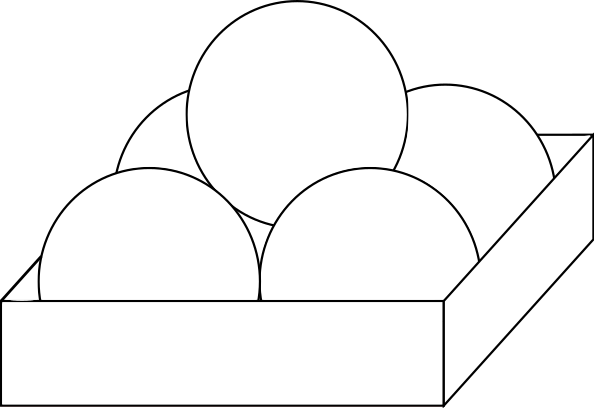
</div>

### Answers:
$ F_{1} = \frac{\sqrt{2} g m}{4}\quad F_{2} = \frac{\sqrt{2} g m}{8} \quad F_{3} = \frac{5 g m}{4} $

### Hint:
Use the following coordinate system to make your like easier:

<div>
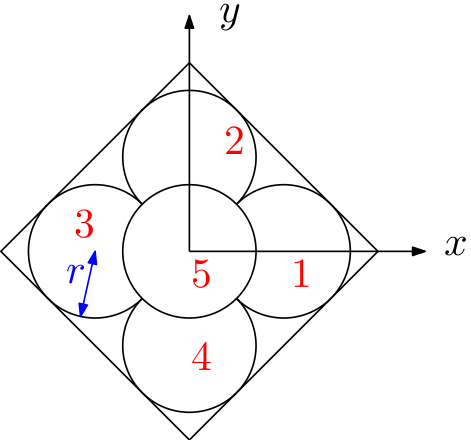
</div>

### Solution 5.2

In [12]:
import sympy as sy
sy.init_printing()

In [13]:
# parameters of the problem
m, g, r = sy.symbols('m, g, r', positive=True)

Note that the billiard balls are smooth (frictionless) spheres. This means that all contact forces are normal forces, and therefore point to the spheres' centers. The weight force also applies to the center. Therefore, we have a structure of systems of concurrent forces, just like a space truss.

I choose a coordinate system with it's origin in the middle of the centers of gravity of the lowest level of billiard balls:

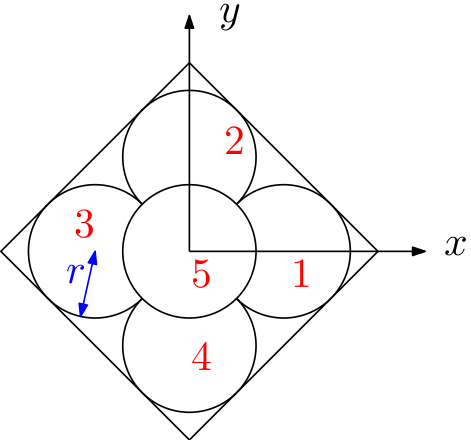

The red numbers are my arbitrary numbering of the billiard balls. The coordinates of the bottom spheres are then easily written down:

In [14]:
# geometry of the problem

# centers of billiard balls
r_1 = r * sy.sqrt(2) * sy.Matrix([ 1,  0, 0])
r_2 = r * sy.sqrt(2) * sy.Matrix([ 0,  1, 0])
r_3 = r * sy.sqrt(2) * sy.Matrix([-1,  0, 0])
r_4 = r * sy.sqrt(2) * sy.Matrix([ 0, -1, 0])

A sideview is useful for determining the position of the top sphere:
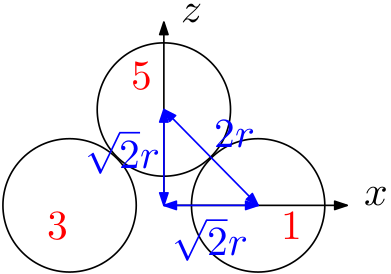

In [15]:
r_5 = r * sy.sqrt(2) * sy.Matrix([ 0,  0, 1])

# direction vectors from the bottom spheres to the top sphere
normed = lambda x: x/x.norm()
n_15 = normed(r_5 - r_1)
n_25 = normed(r_5 - r_2)
n_35 = normed(r_5 - r_3)
n_45 = normed(r_5 - r_4)

In [16]:
# gravitational force
F_w = m * g * sy.Matrix([0, 0, -1])

from symmetry, we can tell that the forces between the top sphere and any bottom sphere have the same magnitude, but differing directions. I therefore introduce only one unknown for answering subquestion 1

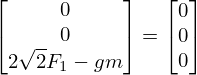

In [17]:
# equilibrium of top sphere
F_1 = sy.symbols("F_1", real=True)
equilibrium_top = sy.Eq(F_1 * (n_15 + n_25 + n_35 + n_45) + F_w, sy.Matrix([0,0,0]))
display(equilibrium_top)

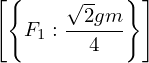

In [18]:
solutions1 = sy.solve(equilibrium_top, F_1, dict=True)
display(solutions1)

We found a single solution, as expected

Answer to sub question 1


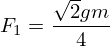

In [19]:
solution1 = solutions1[0]
print("Answer to sub question 1")
display(sy.Eq(F_1, solution1[F_1]))

Again, we can use symmetry here. Each bottom sphere is being pressed by the top sphere, and held back by the frame. I therefore introduce only one unknown for subquestion 2 and one for subquestion 3.

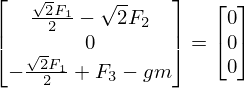

In [20]:
# Equilibrium of bottom sphere 1
F_2, F_3 = sy.symbols("F_2, F_3", real=True)

equilibrium_bottom = sy.Eq(F_3 * sy.Matrix([0, 0, 1]) + 
                        F_2 * (sy.Matrix([-1, 1, 0]) + sy.Matrix([-1, -1, 0]))/sy.sqrt(2) -
                        n_15 * F_1 + F_w, sy.Matrix([0,0,0]))
display(equilibrium_bottom)

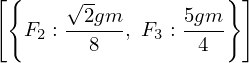

In [21]:
solutions2 = sy.solve(equilibrium_bottom.subs(solution1), F_2, F_3, dict=True)
display(solutions2)

Again, we found a single solution, as expected

Answer to sub question 2


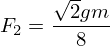

Answer to sub question 3


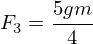

In [22]:
solution2 = solutions2[0]
print("Answer to sub question 2")
display(sy.Eq(F_2, solution2[F_2]))
print("Answer to sub question 3")
display(sy.Eq(F_3, solution2[F_3]))

In [23]:
# for answers in the question
print(sy.latex(sy.Eq(F_1, solution1[F_1])))
print(sy.latex(sy.Eq(F_2, solution2[F_2])))
print(sy.latex(sy.Eq(F_3, solution2[F_3])))

F_{1} = \frac{\sqrt{2} g m}{4}
F_{2} = \frac{\sqrt{2} g m}{8}
F_{3} = \frac{5 g m}{4}


## Supplemental Material

These exercises are not mandatory _yet_. However, since they visualize internal loads in plane trusses, they can be very instructive and help understanding concepts such as zero-force members. Also, they produce pretty graphs.

_You are highly encouraged to play with these they will help you get a feeling for truss problems without having to solve any systems of equations_.

### Computing trusses

We have provided the simple truss calculator module `two_d_truss.py` you can use to visualize plane truss structures.

The following example shows how it can be used to visualize trusses (important to check your model), to build the linear system of equations and to visualize the result.

To use the module, we need to import it like you are used to do with modules like `numpy` and `sympy`

In [1]:
import numpy as np
from two_d_truss import plot_truss
%matplotlib inline

Geometrically, a truss is fully defined by the positions of its joints and a list of struts linking them. `plot_truss` expects both the joint positions and the struts to be defined as `numpy` arrays.

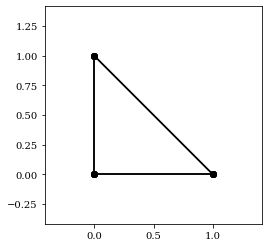

In [2]:
# definition of the joints: A simple matrix with the joint coordinates as rows:
joints = np.array([[0., 0.],  # joint 0
                   [1., 0.],  # joint 1
                   [0., 1.]]) # joint 2

# definition of struts: each strut links two joints:
struts = np.array([[0, 1], # strut from joint 0 to joint 1
                   [1, 2], # strut from joint 1 to joint 2
                   [2, 0]])# strut from joint 2 to joint 0

# this can already be visualized:
plot_truss(joints, struts);

You see a plot of the the three joints (circles) linked by joints (black solid lines. In order to define the truss fully, we need to further define the support reactions. For `plot_truss`, we do that with a list of tuples, each containing the joint index of the support, as well as the direction of reaction. Note that a pin support has two reactions:

In [3]:
# but it's now very interesting yet, without reactions :
reactions = [(0, np.array((1., 0.))), # reaction force in x direction on joint 0
             (0, np.array((0., 1.))), # reaction force in y direction on joint 0
             (1, np.array((0., 1.)))] # reaction force in y direction on joint 1
plot_truss(joints, struts, reactions);

Now the truss is fully defined. In order to generate internal loads, we need to apply some external force. `plot_truss` takes external forces in the same format as reactions, as a list of joint index - force vector tuples.

In [4]:
# and without external forces:
forces = [(2, np.array((1., 1.)))] # a force in (1,1) direction applied to joint 2
plot_truss(joints, struts, reactions, forces);

If we add the argument `with_solution=True`, `plot_truss` computes the solution of the problem and visualizes them.

In [5]:
# the tool also lets you compute the internal reactions easily
plot_truss(joints, struts, reactions, forces, with_solution=True);

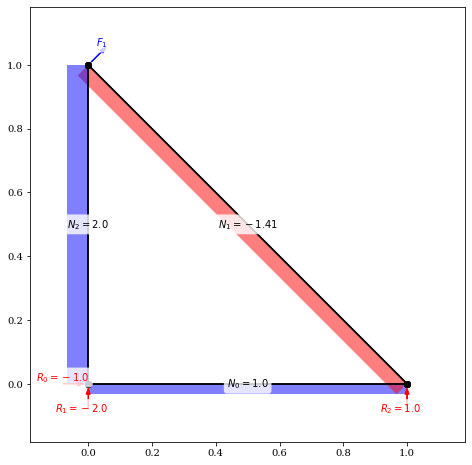

In [6]:
# you can also play with the size of the plot and the reactions by using the
# parameters `border` and `scale` (read the help on `plot_truss` for details).

plot_truss(joints, struts, reactions, forces,
           with_solution=True, scale=2, border=.06);

This can also be used for much more complicated trusses, e.g. the truss for Exercise 5.4:

<div>
    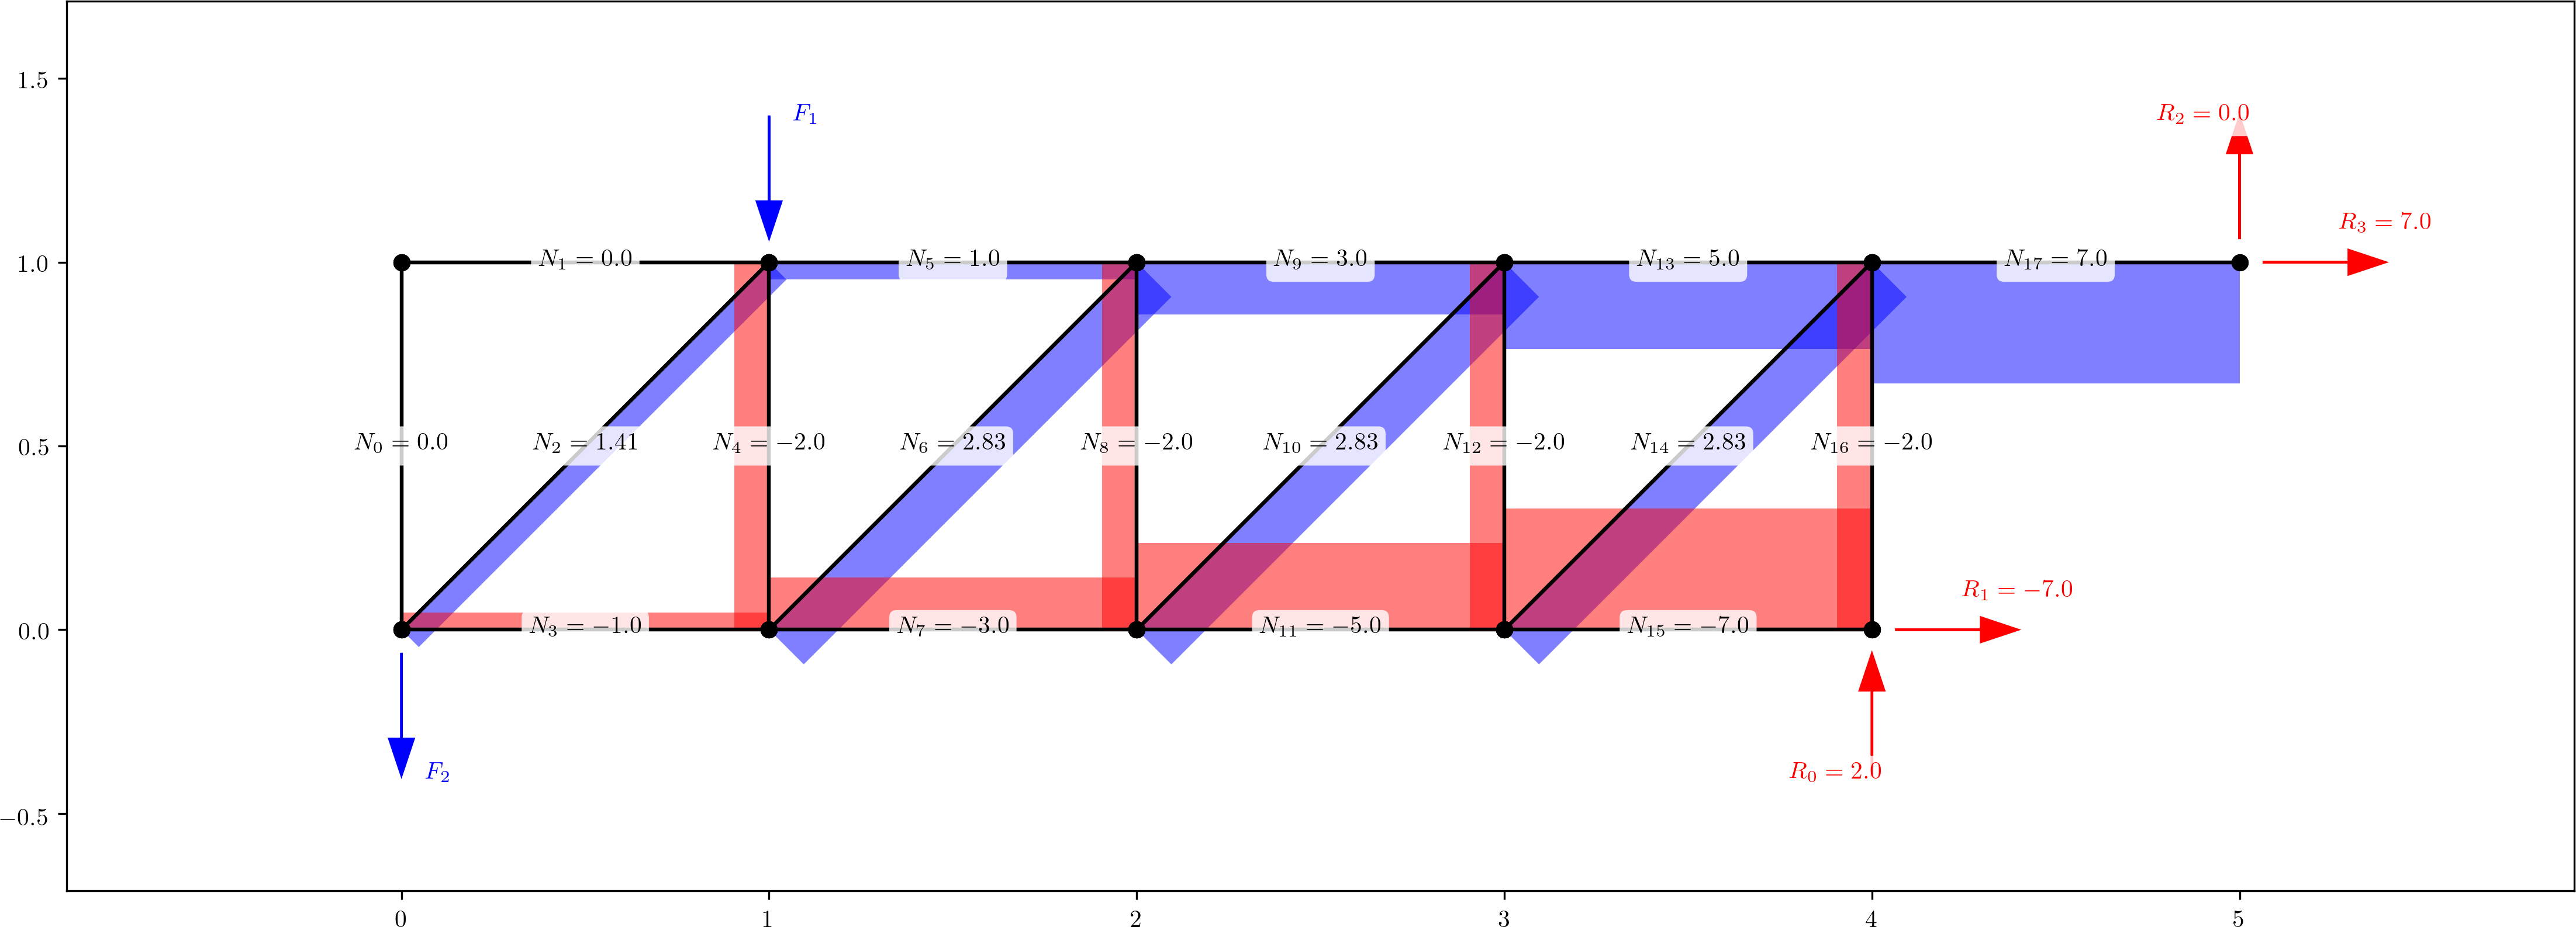
</div>

#### Tasks:
1. What happens if you exclude a strut in above example, why?
1. What happens in above example if you apply a reaction in $x$ direction to joint 1, instead of in $y$, why?
1. Use `plot_truss` to check your results on exercise 5.1. For numerical parameters, take $L= 100 \mathrm{kN}$ and $b = 2 \mathrm{m}$
1. For the model crane, compute the internal loads in all elements when a load of $P = 3\mathrm{N}$ is applied to the outermost point of the jib. Find which struts are not loaded and explain whether they could be removed (or, if not, explain the situation in which they  are loaded).

<div>
    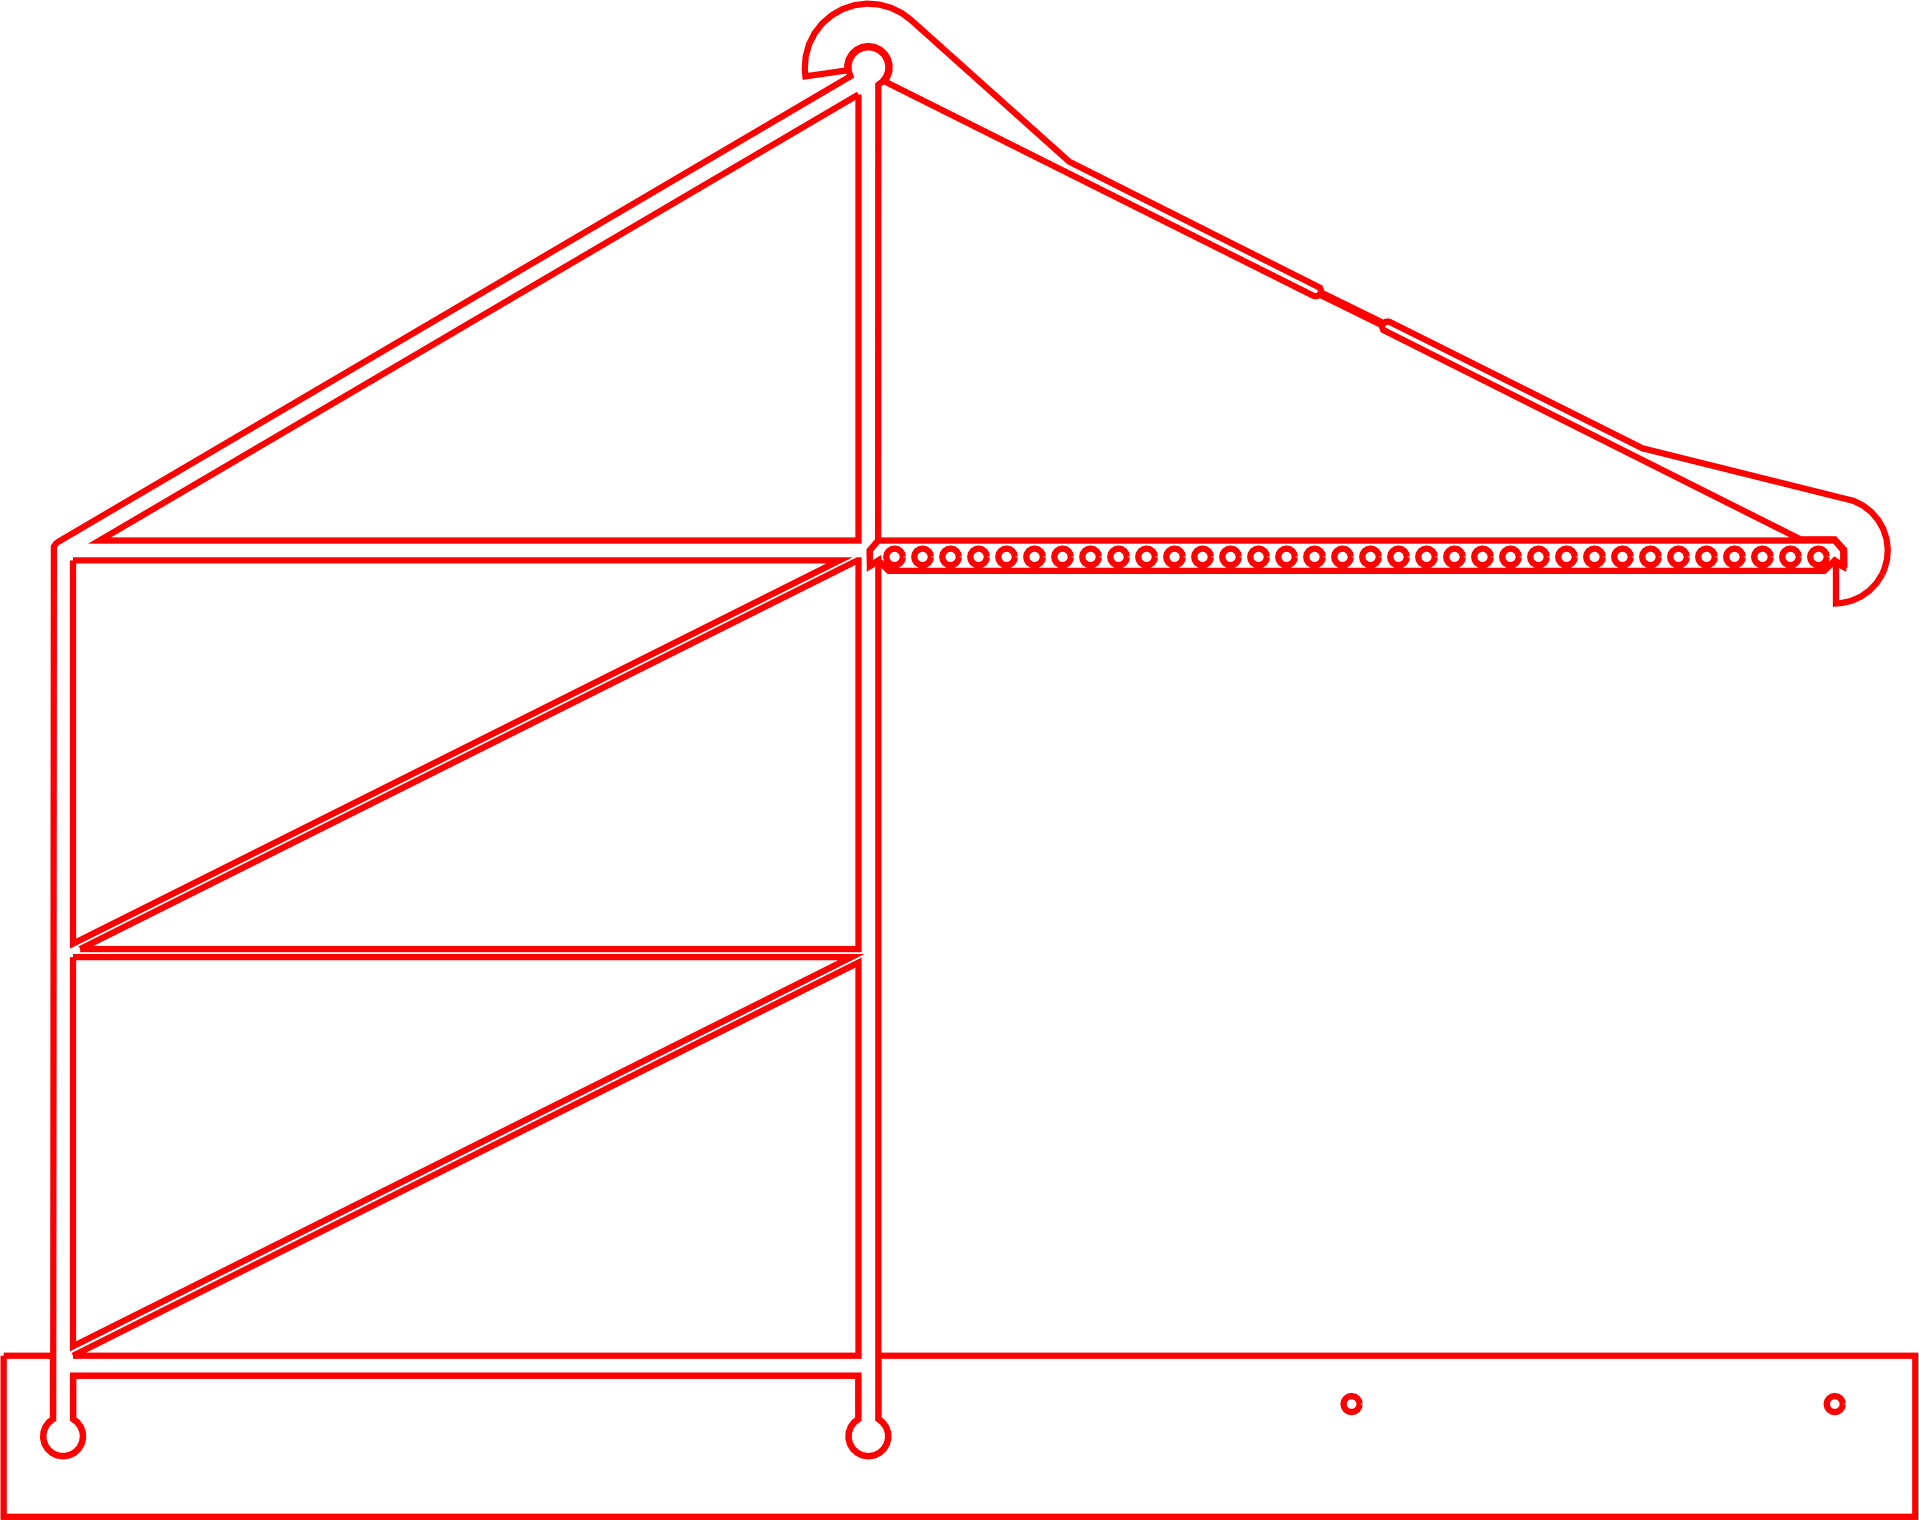
</div>

### Solutions supplemental material

Exception: odd number of unknowns! In 2d, there has to be an even number of unknowns.

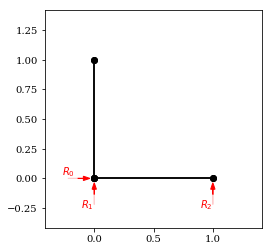

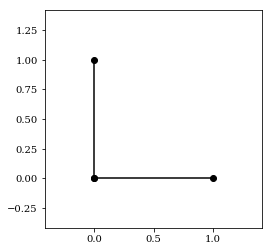

Exception: odd number of unknowns! In 2d, there has to be an even number of unknowns.

In [14]:
# Task 1.
joints = np.array([[0., 0.],  # joint 0
                   [1., 0.],  # joint 1
                   [0., 1.]]) # joint 2
struts = np.array([[0, 1], # strut from joint 0 to joint 1
                   [2, 0]])# strut from joint 2 to joint 0
reactions = [(0, np.array((1., 0.))), # reaction force in x direction on joint 0
             (0, np.array((0., 1.))), # reaction force in y direction on joint 0
             (1, np.array((0., 1.)))] # reaction force in y direction on joint 1

plot_truss(joints, struts, reactions);
plot_truss(joints, struts, reactions, with_solution=True);


The function detected that the necessary conditions for statical determinacy $2j = m+r$ was not satisfied.

LinAlgError: Singular matrix

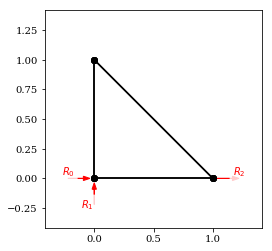

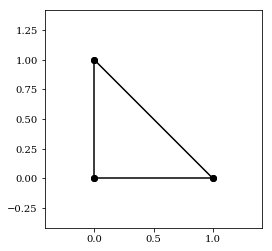

LinAlgError: Singular matrix

In [15]:
# Task 2.
joints = np.array([[0., 0.],  # joint 0
                   [1., 0.],  # joint 1
                   [0., 1.]]) # joint 2
struts = np.array([[0, 1], # strut from joint 0 to joint 1
                   [1, 2], # strut from joint 1 to joint 2
                   [2, 0]])# strut from joint 2 to joint 0
reactions = [(0, np.array((1., 0.))), # reaction force in x direction on joint 0
             (0, np.array((0., 1.))), # reaction force in y direction on joint 0
             (1, np.array((1., 0.)))] # reaction force in x direction on joint 1

plot_truss(joints, struts, reactions);
plot_truss(joints, struts, reactions, with_solution=True);


Even though the necessary condition for statical determinacy $2j = m+r$ was satisfied, the reactions create a concurrent system of forces (instantaneous center of rotatation around joint 0), and the corresponding matrix is singular.

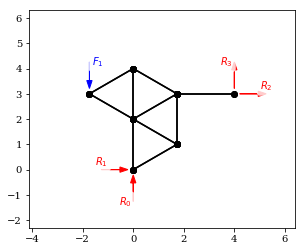

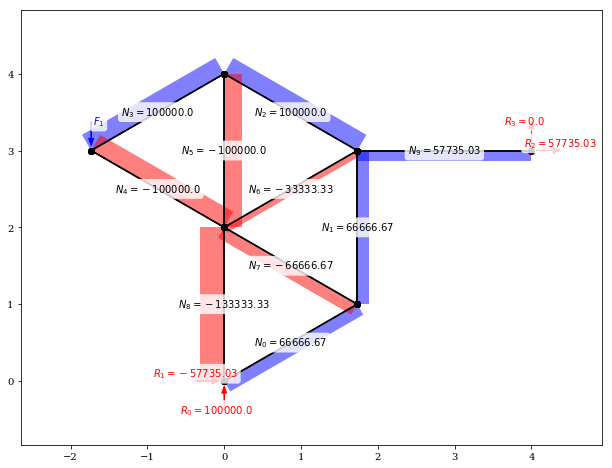

In [18]:
# Task 3.
b = 2     # in [m]
L = 100e3 # in [N]
b2 = b/2
bs = 3**.5/2*b
joints = np.array((( 0,  0),    # A 0
                   (bs, b2),    # B 1
                   (bs, b2+b),  # C 2
                   ( 0, 2*b),   # D 3
                   (-bs, b2+b), # E 4
                   ( 0, b),     # F 5
                   (2*b, b+b2)))# G 6

struts = np.array(((0, 1),
                   (1, 2),
                   (2, 3),
                   (3, 4),
                   (4, 5),
                   (3, 5),
                   (2, 5),
                   (1, 5),
                   (0, 5),
                   (2, 6)))

reactions = ((0, np.array((0, 1.))),
             (0, np.array((1, 0.))),
             (6, np.array((1, 0.))),
             (6, np.array((0, 1.))))

forces = [(4, np.array((0, -L)))]

plot_truss(joints, struts, reactions, forces);
plot_truss(joints, struts, reactions, forces, with_solution=True, scale=2,
           border=.05);



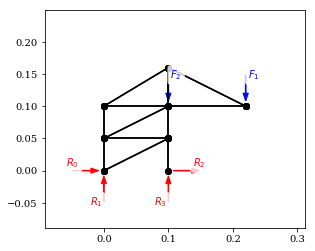

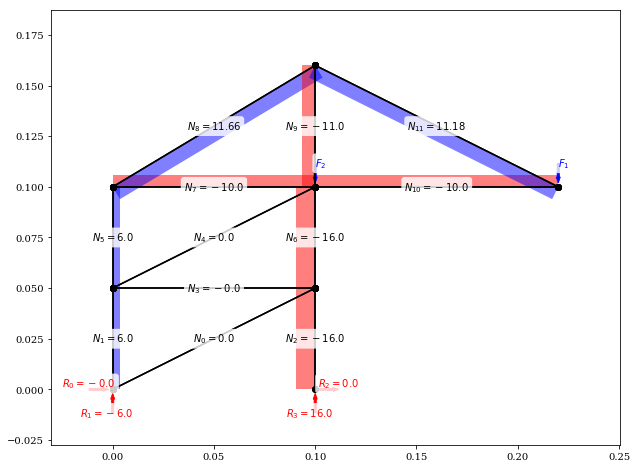

In [21]:
# Task 4.
# geometric parameters
h_top_frame =  6.0e-2 # in [m]
h_frame =      5.0e-2
w_frame =     10.0e-2
l_beam =      12.0e-2

# load
P = 5. # in [N]

joints = np.array([[0, 0],
                   [w_frame, 0],
                   [0, h_frame],
                   [w_frame, h_frame],
                   [0, 2*h_frame],
                   [w_frame, 2*h_frame],
                   [w_frame, 2*h_frame + h_top_frame],
                   [w_frame + l_beam, 2*h_frame]])

struts = np.array([[0, 3],
                   [0, 2],
                   [1, 3],
                   [2, 3],
                   [2, 5],
                   [2, 4],
                   [3, 5],
                   [4, 5],
                   [4, 6],
                   [5, 6],
                   [5, 7],
                   [6, 7]])
reactions = [(0, np.array((1., 0.))),
             (0, np.array((0., 1.))),
             (1, np.array((1., 0.))),
             (1, np.array((0., 1.)))]
forces = [[7, np.array((0, -P))],
          [5, np.array((0, -P))]]
plot_truss(joints, struts, reactions, forces);
plot_truss(joints, struts, reactions, forces, with_solution=True, scale=2, border=.04);

The struts 0, 3, and 4 are not loaded in this situation. However, they are required to maintain the shape of the crane (it would be a hypostatic mechanism without them.).

If the crane is loaded obliquely (for example whet the load is swining), they become loaded again:

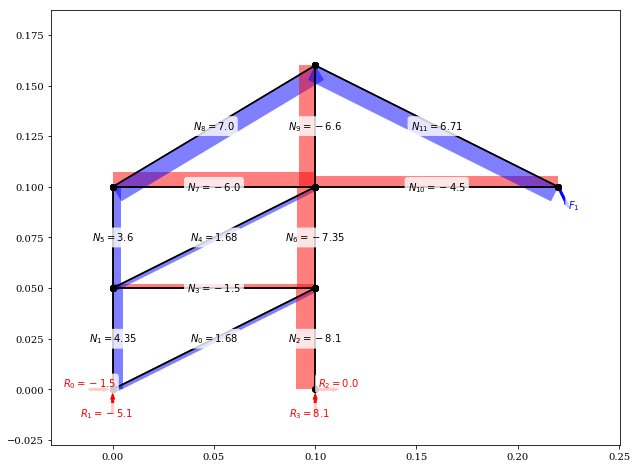

In [17]:
forces = [[7, np.array((.5*P, -P))]]
plot_truss(joints, struts, reactions, forces, with_solution=True, scale=2, border=.04);